In [1]:
from google.colab import files
uploaded = files.upload()

Saving labeled_combined_data.csv to labeled_combined_data.csv


In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [3]:
import io
pd.set_option('display.max_columns', None)
df = pd.read_csv(io.BytesIO(uploaded["labeled_combined_data.csv"]))
df.head()

df = df[['rfh_avg', 'vim_avg', 'rh_anoms', 't_abs', 'magnitude']]

In [4]:
X = df.drop('magnitude', axis = 1)
y = df['magnitude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8347107438016529


In [5]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,200),
              'criterion': ('gini', 'entropy', 'log_loss'),
              'min_samples_split': randint(2, 1000),
              'min_samples_leaf': randint(1, 1000),
              }

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)
y_pred2 = best_rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred2))

Best hyperparameters: {'criterion': 'gini', 'max_depth': 44, 'min_samples_leaf': 523, 'min_samples_split': 872, 'n_estimators': 66}
Accuracy: 0.8512396694214877


In [7]:
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
import IPython.display
import graphviz

In [9]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)

    # Save the graph as a file (e.g., in PNG format)
    graph.render(filename=f"decision_tree_{i+1}", format="png")

    # Display the graph in the notebook (optional)
    IPython.display.display(graph)

AttributeError: ignored

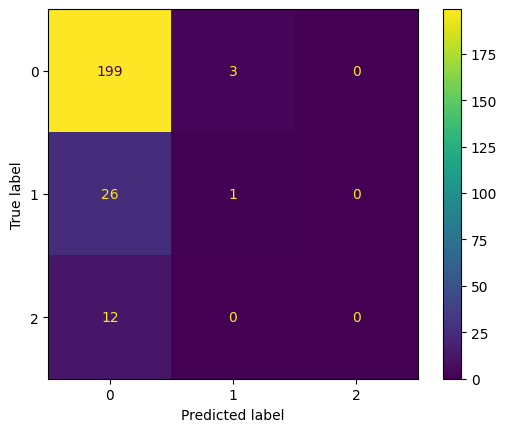

In [127]:
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

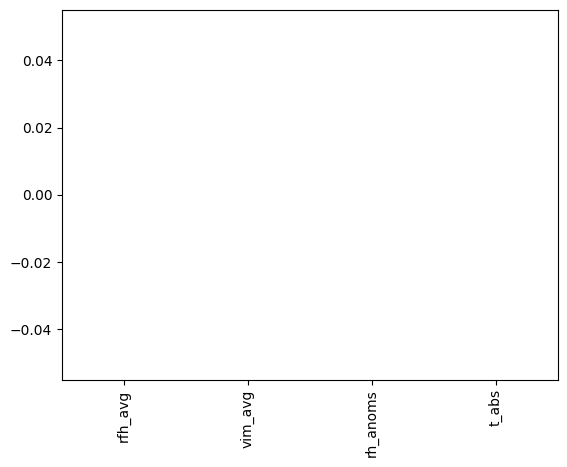

In [99]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();